<a href="https://colab.research.google.com/github/benasphy/Blockchain_endpoints/blob/main/KMeans_From_Scratch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Centroids:
 [[8.16666667 5.66666667]
 [1.16666667 1.46666667]]
Cluster assignments: [1 1 0 0 1 0 0 0 0]


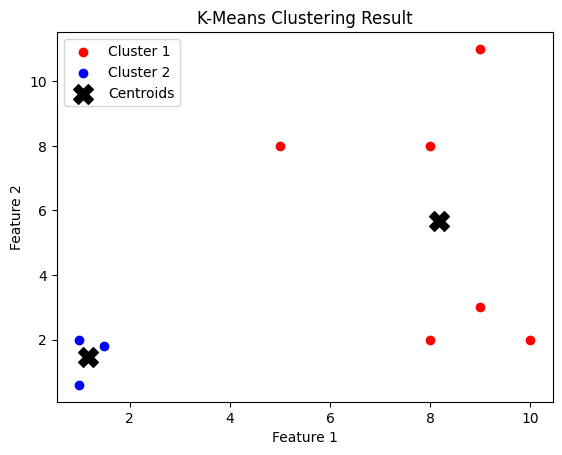

In [13]:
import numpy as np
import matplotlib.pyplot as plt

class KMeans:
    def __init__(self, K=2, max_iters=100):
        self.K = K
        self.max_iters = max_iters
        self.centroids = None
        self.clusters = None

    def fit(self, X):
        n_samples, n_features = X.shape

        # Step 1: initialize centroids randomly
        random_indices = np.random.choice(n_samples, self.K, replace=False)
        self.centroids = X[random_indices]

        for _ in range(self.max_iters):
            # Step 2: assign points to the nearest centroid
            self.clusters = self._create_clusters(X)

            # Step 3: compute new centroids
            new_centroids = np.array([X[self.clusters == k].mean(axis=0) for k in range(self.K)])

            # Stop if centroids do not move
            if np.allclose(self.centroids, new_centroids):
                break

            self.centroids = new_centroids

    def _create_clusters(self, X):
        # compute Euclidean distances from each point to each centroid
        distances = np.linalg.norm(X[:, np.newaxis] - self.centroids, axis=2)
        # assign to the closest centroid
        return np.argmin(distances, axis=1)

    def predict(self, X):
        return self._create_clusters(X)


# ---- Example Dataset ----
X = np.array([
    [1, 2],
    [1.5, 1.8],
    [5, 8],
    [8, 8],
    [1, 0.6],
    [9, 11],
    [8, 2],
    [10, 2],
    [9, 3],
])

# ---- Train Model ----
kmeans = KMeans(K=2, max_iters=100)
kmeans.fit(X)

print("Centroids:\n", kmeans.centroids)
print("Cluster assignments:", kmeans.clusters)

# ---- Visualization ----
colors = ['red', 'blue', 'green', 'purple', 'orange']
for k in range(kmeans.K):
    cluster_points = X[kmeans.clusters == k]
    plt.scatter(cluster_points[:, 0], cluster_points[:, 1], color=colors[k], label=f"Cluster {k+1}")

# plot centroids
plt.scatter(
    kmeans.centroids[:, 0],
    kmeans.centroids[:, 1],
    s=200,
    color='black',
    marker='X',
    label='Centroids'
)

plt.title("K-Means Clustering Result")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.legend()
plt.show()
